In [ ]:
import sys
import numpy as np

In [ ]:
def read_array_from_file(filename, dtype=float):
  """
  Reads an array of the specified data type from a binary file.

  Args:
      filename (str): The name of the file to read from.
      dtype (dtype, optional): The data type of the elements in the array.
          Defaults to float.

  Returns:
      numpy.ndarray: The array read from the file.
  """

  with open(filename, "rb") as file:
    # Read the size of the array
    size = np.fromfile(file, dtype=np.int64, count=1)[0]

    # Read the array elements
    data = np.fromfile(file, dtype=dtype, count=size)

  return data


In [ ]:
import matplotlib.pyplot as plt
values = np.nan_to_num(read_array_from_file("diff.bin", np.float64))
absmax = 0.01 * np.std(np.abs(values))

plt.plot(values)
plt.ylim(-absmax, absmax)
plt.show()


In [ ]:
import matplotlib.pyplot as plt
values = np.nan_to_num(read_array_from_file("diff2.bin", np.float64))
absmax = np.max(np.abs(values))

plt.plot(values)
plt.ylim(-absmax, absmax)
plt.show()


In [ ]:
import sys
import numpy as np
import matplotlib.pyplot as plt

def read_array_from_file(filename, dtype=float):
  """
  Reads an array of the specified data type from a binary file.

  Args:
      filename (str): The name of the file to read from.
      dtype (dtype, optional): The data type of the elements in the array.
          Defaults to float.

  Returns:
      numpy.ndarray: The array read from the file.
  """

  with open(filename, "rb") as file:
    # Read the size of the array
    size = np.fromfile(file, dtype=int, count=1)[0]

    # Read the array elements
    data = np.fromfile(file, dtype=np.float32, count=size)

  return data

In [ ]:
muVec = read_array_from_file("./muVec.bin")[1:]
stdVec = np.sqrt(read_array_from_file("./varVec.bin")[1:])

plt.plot(muVec, label='mean')
plt.plot(muVec + 2 * stdVec, label='upper')
plt.plot(muVec - 2 * stdVec, label='lower')

plt.show()

In [1]:
#%matplotlib widget
import matplotlib.pyplot as plt
import numpy as np
import scipy.sparse as sparse
#plt.style.use('_mpl-gallery')

In [2]:
def read_matrix_from_file(filename):
    """Reads a matrix from a binary file written by the C++ code."""
    try:
        with open(filename, "rb") as f:
            rows = np.fromfile(f, dtype=np.int32, count=1)[0]
            cols = np.fromfile(f, dtype=np.int32, count=1)[0]
            matrix = np.fromfile(f, dtype=np.float64, count=rows * cols).reshape(cols, rows)
            return matrix.T
    except FileNotFoundError:
        print(f"Error: File not found: {filename}")
        return None
    except Exception as e: # Catch other potential errors during file reading
        print(f"An error occurred: {e}")
        return None


In [ ]:
import os
os.environ["OPENCV_IO_ENABLE_OPENEXR"] = "1"
import cv2
mat = read_matrix_from_file("./PSRtestSvalue.bin")
final = np.empty((mat.shape[0], mat.shape[1], 3))
final[..., 0] = mat
final[..., 1] = mat
final[..., 2] = mat
print(final.shape)
final = final.astype(np.float32)
cv2.imwrite("./test/grayScaleImage2SSD.exr", final)

(2048, 2048, 3)


error: OpenCV(4.8.1) D:\a\opencv-python\opencv-python\opencv\modules\imgcodecs\src\grfmt_exr.cpp:103: error: (-213:The function/feature is not implemented) imgcodecs: OpenEXR codec is disabled. You can enable it via 'OPENCV_IO_ENABLE_OPENEXR' option. Refer for details and cautions here: https://github.com/opencv/opencv/issues/21326 in function 'cv::initOpenEXR'


In [3]:
def visualize_matrix_sparsity(matrix, title="Matrix Sparsity"):
    """Visualizes the sparsity pattern of a matrix using matplotlib.

    Args:
        matrix: A NumPy array or SciPy sparse matrix.
        title: The title of the plot.
    """

    plt.figure(figsize=(8, 6))  # Adjust figure size for better visualization

    if sparse.issparse(matrix):
        plt.spy(matrix, markersize=1)  # Use spy for sparse matrices
    else:
        plt.imshow(matrix, cmap="viridis", interpolation="nearest") # imshow for dense matrices

    plt.title(title)
    plt.xlabel("Columns")
    plt.ylabel("Rows")
    plt.colorbar(label="Value (if dense)") # Add colorbar for dense matrices
    plt.tight_layout() # Adjust layout to prevent labels from overlapping
    plt.show()

In [4]:
invGT = read_matrix_from_file("./mats/invSVDmat.bin")
# invGT1 = read_matrix_from_file("./invSVDmat.bin")
a = read_array_from_file("./mats/vecVarSimp237.bin")
# invGT = np.sqrt(np.maximum(invGT, 0.0))
# for k in [128, 181, 256, 362, 512, 724, 1024, 1448, 2048, 2896, 4096]:
#     for mode in [0, 1, 2, 3]:
#         inv = read_matrix_from_file(f"./mats/invSVDmat_M{mode}_K{k}.bin")
#         inv = np.sqrt(inv)
#         inv = np.abs(inv - invGT)/invGT
#         print(np.mean(inv), end=', ')
#     print("")

print("")
print("")
print("")
print("")

# for k in [128, 181, 256, 362, 512, 724, 1024, 1448, 2048, 2896, 4096]:
#     for mode in [0, 1, 2, 3]:
#         inv = read_matrix_from_file(f"./mats/invSVDmat_M{mode}_K{k}.bin")
#         inv = np.sqrt(inv)
#         inv = np.abs(inv - invGT)/np.maximum(invGT, 1e-6)
#         print(np.mean(np.diag(inv)), end=', ')
#     print("")

np.mean(np.abs(np.sqrt(np.diag(invGT)) - np.sqrt(a)) / np.sqrt(np.diag(invGT)))
# print(np.mean(np.abs(invGT - inv)))
# print(np.mean(np.abs(np.diag(invGT) - np.diag(inv))))

NameError: name 'read_array_from_file' is not defined

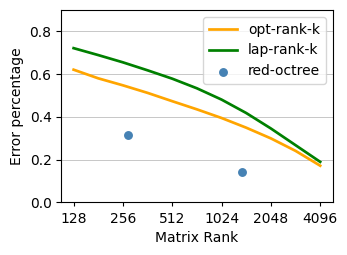

In [24]:
opt_k = [
    0.620539621,
    0.580136935,
    0.547395404,
    0.512104248,
    0.473214582,
    0.435137769,
    0.394662202,
    0.349377237,
    0.299330983,
    0.241033476,
    0.171649362 ]
lap_k = [
    0.721227343,
    0.688829644,
    0.654873628,
    0.617567421,
    0.578470914,
    0.533537025,
    0.480695034,
    0.417970392,
    0.345661664,
    0.267647031,
    0.189561115]

val_k = [
    128,
    181,
    256,
    362,
    512,
    724,
    1024,
    1448,
    2048,
    2896,
    4096]

redOctree=[ 0.315845489, 0.14282730 ]

val_k1 = [273, 1357]

plt.close()
plt.figure(figsize=(3.5, 2.5))
plt.plot(val_k, opt_k, label='opt-rank-k', color='orange', linewidth=1.95)
plt.plot(val_k, lap_k, label='lap-rank-k', color='green', linewidth=1.95)
plt.scatter(val_k1, redOctree, label='red-octree', color='steelblue', s=29)
plt.xscale('log')
plt.legend()
plt.grid(False)
plt.xlabel('Matrix Rank', fontsize=10)
plt.ylabel('Error percentage', fontsize=10)
plt.ylim(0, 0.9)
plt.xticks([128, 256, 512, 1024, 2048, 4096], [str(val) for val in [128, 256, 512, 1024, 2048, 4096]])
plt.gca().set_xticks([128, 256, 512, 1024, 2048, 4096])
plt.gca().xaxis.set_tick_params(which='major', length=3) # Adjust length as needed
plt.gca().set_xticks([], minor=True) # remove minor ticks
plt.grid(axis='y', linestyle='-', linewidth=0.5)
# plt.subplots_adjust(left=0.2, bottom=0.2, right=0.9, top=0.9)
plt.savefig('./figures/CovEsti.pdf', bbox_inches='tight', dpi=2048, pad_inches=0.03)
plt.show()

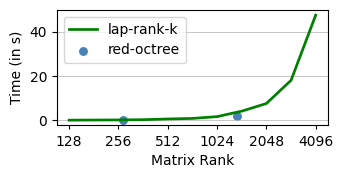

In [25]:
lap_k = [
    0.083922,
    0.15257,
    0.1832,
    0.30225,
    0.633,
    0.86169,
    1.6879,
    4.15443,
    7.6099,
    18.0785,
    47.54]

val_k = [
    128,
    181,
    256,
    362,
    512,
    724,
    1024,
    1448,
    2048,
    2896,
    4096]

redOctree=[ 0.0946, 2.1 ]

val_k1 = [273, 1357]
base = 244.9

# lap_k = base / np.array(lap_k)
# redOctree = base / np.array(redOctree)

plt.close()
plt.figure(figsize=(3.5, 1.5))
# plt.plot(val_k, opt_k, label='opt-rank-k', color='orange', linewidth=1.95)
plt.plot(val_k, lap_k, label='lap-rank-k', color='green', linewidth=1.95)
plt.scatter(val_k1, redOctree, label='red-octree', color='steelblue', s=29)
plt.xscale('log')
plt.legend()
plt.grid(False)
plt.xlabel('Matrix Rank', fontsize=10)
plt.ylabel('Time (in s)', fontsize=10)
plt.xticks([128, 256, 512, 1024, 2048, 4096], [str(val) for val in [128, 256, 512, 1024, 2048, 4096]])
#plt.ylim(0.0, 0.2)
plt.gca().set_xticks([128, 256, 512, 1024, 2048, 4096])
plt.gca().xaxis.set_tick_params(which='major', length=3) # Adjust length as needed
plt.gca().set_xticks([], minor=True) # remove minor ticks
plt.grid(axis='y', linestyle='-', linewidth=0.5)
plt.savefig('./figures/CovEstiTime.pdf', bbox_inches='tight', dpi=2048, pad_inches=0.03)
plt.show()

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=7)

for i, k in enumerate([128, 256, 512, 1024, 2048, 4096, 0]):
    for mode in [1]:
        if k == 0:
            inv = np.diag(invGT)
        else:
            inv = np.diag(np.sqrt(np.maximum(read_matrix_from_file(f"./mats/invSVDmat_M{mode}_K{k}.bin"), 0.0)))
        print(i)
        axs[i].hist(inv, bins=512)
        axs[i].set_xlim(0, np.max(np.diag(invGT)))
        axs[i].set_ylim(0, 400)

# inv = np.diag(np.sqrt(np.maximum(read_matrix_from_file(f"./mats/invSVDmat_M{1}_K{128}.bin"), 0.0)))
# # inv = np.diag(invGT)
# print(inv.shape)
# plt.hist(inv, bins=128)


In [ ]:
invGT = np.sqrt(np.maximum(np.ndarray.flatten(np.load("./test/varK0.bin.npy")), 0.0))
# invGT = read_matrix_from_file("./mats/invSVDmat.bin")
# invGT = read_matrix_from_file("./mats/invSVDmat.bin")
for k in [128, 256, 362, 512, 724, 1024, 1448, 2048]:
    inv = np.ndarray.flatten(np.load(f"./test/varK{k}.bin.npy"))
    inv = np.sqrt(inv)
    inv = np.abs(inv - invGT) / inv
    inv
    print(np.mean(inv[inv < 100]), end=', ')

inv

In [ ]:
inv = read_matrix_from_file(f"./mats/invSVDmat_M3_K2896.bin")
inv

In [ ]:
print(np.mean(np.abs(invGT - inv)))
print(np.mean(np.abs(np.diag(invGT) - np.diag(inv))))

In [ ]:
np.sum(inv[0, :] > 50.0)

In [ ]:
conv = read_matrix_from_file("conv.bin")
a = conv.T @ conv
np.sum(np.abs(np.identity(a.shape[0]) - a))
# np.sum(np.abs(np.diag(np.identity(a.shape[0])) - np.diag(a)))

In [ ]:
G=33
# T=0.5*G
x = np.linspace(0., G-1, num=G)
y = np.linspace(0., G-1, num=G)
def fun(o, c):
    # return np.cos(np.pi * o * x / (G-1)) * np.cos(np.pi * c * y / (G-1))
    return np.cos(np.pi * o * x / (G-1))

np.mean(fun(3,2) * fun(5,2))

In [ ]:
import numpy as np

# To-do: this should output values too.

def grid_laplacian_eigenfunctions(num_modes,gs,l):
    """
    Returns the eigenfunctions and eigenvalues of the Laplacian on a regular grid with Neumann boundary conditions.
    
    Parameters
    ----------
    num_modes : int
        Number of eigenfunctions and eigenvalues to return
    gs : (dim,) int numpy array
        Grid size in each dimension
    l : (dim,) float numpy array
        Length of the grid in each dimension
    
    Returns
    -------
    vecs : (num_grid_points,num_modes) numpy array
        Eigenfunctions

    See also
    --------
    poisson_surface_reconstruction

    Notes
    -----
    This function uses the formula in "Eigenvalues of the Laplacian with Neumann Boundary Conditions" by H. P. W. Gottlieb, 1985. Right now, this function only works for 3D and 2D grids. It should be easy/trivial to extend to higher dimensions.

    Examples
    --------
    ```python
    import numpy as np
    import gpytoolbox
    gs = np.array([10,10])
    l = np.array([1.0,1.0])
    num_modes = 10
    vecs, vals = gpytoolbox.grid_laplacian_eigenfunctions(num_modes,gs,l)
    ```
    """

    # There's probably some refactoring that could be done on this code so that the dimensionality is not hard-coded.

    # Get grid
    dim = gs.shape[0]

    def psi(N,l,v):
        d = v.shape[1]
        out = np.ones(v.shape[0])
        val = 0
        for dd in range(d):
            out = out*np.cos(N[dd]*np.pi*v[:,dd]/l[dd])
            val = val + (np.pi**2.0)*((N[dd]/l[dd])**2.0)
        return out, val


    if dim==3:
        gx, gy, gz = np.meshgrid(np.linspace(0,l[0],gs[0]),np.linspace(0,l[1],gs[1]),np.linspace(0,l[2],gs[2]),indexing='ij')
        v = np.concatenate((np.reshape(gx,(-1, 1),order='F'),np.reshape(gy,(-1, 1),order='F'),np.reshape(gz,(-1, 1),order='F')),axis=1)
        # This is ad-hoc so it's faster... We should come up with a smarter way of doing this.
        num_in_each_dim = round(np.sqrt(num_modes//8))
        # num_in_each_dim = num_modes
        vals_debug = np.zeros(num_in_each_dim*num_in_each_dim*num_in_each_dim)
        K_vector = np.arange(num_in_each_dim*num_in_each_dim*num_in_each_dim) % num_in_each_dim
        J_vector = np.arange(num_in_each_dim*num_in_each_dim*num_in_each_dim) // num_in_each_dim % num_in_each_dim
        I_vector = np.arange(num_in_each_dim*num_in_each_dim*num_in_each_dim) // (num_in_each_dim*num_in_each_dim)

        ind_vectors = []
        ind_vectors.append(I_vector)
        ind_vectors.append(J_vector)
        ind_vectors.append(K_vector)
        for dd in range(dim):
            vals_debug = vals_debug + (np.pi**2.0)*((ind_vectors[dd]/l[dd])**2.0)
        # assert((vals_debug==vals).all())
        order = np.argsort(vals_debug)
        relevant_indices = order[0:num_modes]
        vecs_debug = np.ones((v.shape[0],num_modes))
        for s in range(len(relevant_indices)):
            vecs_debug[:,s], _ = psi([I_vector[relevant_indices[s]],J_vector[relevant_indices[s]],K_vector[relevant_indices[s]]],l,v)
        vecs = vecs_debug
        vals = vals_debug
        vals = vals[relevant_indices]
    else:
        gx, gy = np.meshgrid(np.linspace(0,l[0],gs[0]),np.linspace(0,l[1],gs[1]))
        # h = np.array([gx[1,1]-gx[0,0],gy[1,1]-gy[0,0]])
        v = np.concatenate((np.reshape(gx,(-1, 1)),np.reshape(gy,(-1, 1))),axis=1)
        num_in_each_dim = num_modes // 10 
        num_in_each_dim = num_modes
        vals = np.zeros(num_in_each_dim*num_in_each_dim)

        I_vector = np.arange(num_in_each_dim*num_in_each_dim)// num_in_each_dim
        
        J_vector = np.arange(num_in_each_dim*num_in_each_dim)% num_in_each_dim
        
        ind_vectors = []
        ind_vectors.append(I_vector)
        ind_vectors.append(J_vector)

        for dd in range(dim):
            vals = vals + (np.pi**2.0)*((ind_vectors[dd]/l[dd])**2.0)
        order = np.argsort(vals)
        relevant_indices = order[0:num_modes]
        vecs_debug = np.ones((v.shape[0],num_modes))
        for s in range(len(relevant_indices)):
            vecs_debug[:,s], _ = psi([I_vector[relevant_indices[s]],J_vector[relevant_indices[s]]],l,v)
        # print(I_vector[relevant_indices])
        # print(J_vector[relevant_indices])
        vecs = vecs_debug
        vals = vals[relevant_indices]
    # This is not necessary
    # vecs = vecs/np.tile(np.linalg.norm(vecs,axis=0),(vecs.shape[0],1))
    # print(np.linalg.norm(vecs,axis=0),(vecs.shape[0],1))

    return vecs

In [ ]:
L = grid_laplacian_eigenfunctions(1024,np.array((32, 32)), np.array((1., 1.)))
a = L.T @ L
np.mean(np.abs(np.identity(1024) - a))

In [32]:
def read_array_from_file(filename):
    with open(filename, "rb") as file:
        # Read the size of the array
        size = np.fromfile(file, dtype=np.int32, count=1)[0]

        # Read the array elements
        data = np.fromfile(file, dtype=np.float32, count=size)
    return data
data = read_array_from_file("./output/stats/Cat_60K_0.002_2_xyErrors.bin")
# plt.hist(data, bins=400, density=True, color="#7faefa", alpha=0.8)
# x = np.linspace(np.min(data), np.max(data), 1000)
# std = 1
# plt.plot(x, np.exp(-0.5*x**2/std**2)/(np.sqrt(2*np.pi)*std), color="#609cfc")
# plt.xlim(-8, 8)
np.std(data)
data.shape

(120856,)

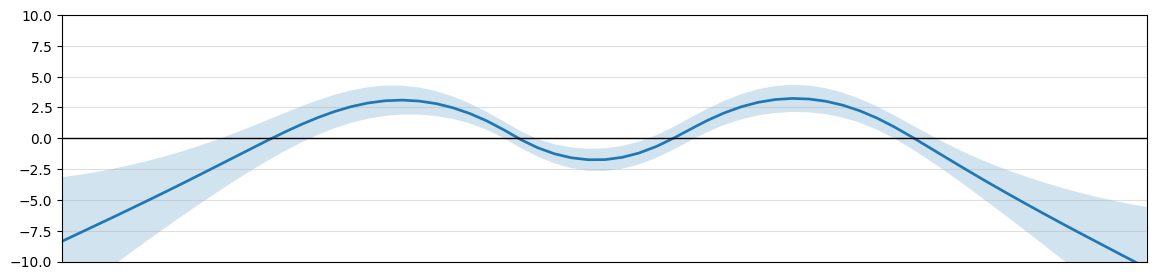

In [97]:
import matplotlib.transforms as mtransforms

mu = read_array_from_file("muLine.txt")
std = np.sqrt(read_array_from_file("varLine.txt"))
plt.close()
plt.figure(figsize=(4*3.5, 4*0.8))
plt.plot(list(range(len(mu))), mu, linewidth=1.95)
plt.fill_between(list(range(len(mu))), mu-std, mu+std, alpha = 0.2)
plt.grid(False)
plt.grid(axis='y', linestyle='-', linewidth=0.8, alpha=0.4)
plt.xlim(0, len(mu))
plt.ylim(-10, 10)
plt.xticks([])  # Or plt.gca().set_xticks([])
plt.axhline(y=0, color='black', linewidth=1)

# We need a renderer to calculate the bbox
renderer = plt.gcf().canvas.get_renderer()

# Get the tight bounding box in *figure pixels*
tight_bbox_px = plt.gcf().get_tightbbox(renderer)

expanded_bbox_px = tight_bbox_px.padded(0) # Start with an exact copy
expanded_bbox_px.y1 += 0.2

plt.savefig('./figures/1DexMuStd.pdf', bbox_inches=expanded_bbox_px, dpi=1024, pad_inches=0.03)
plt.show()


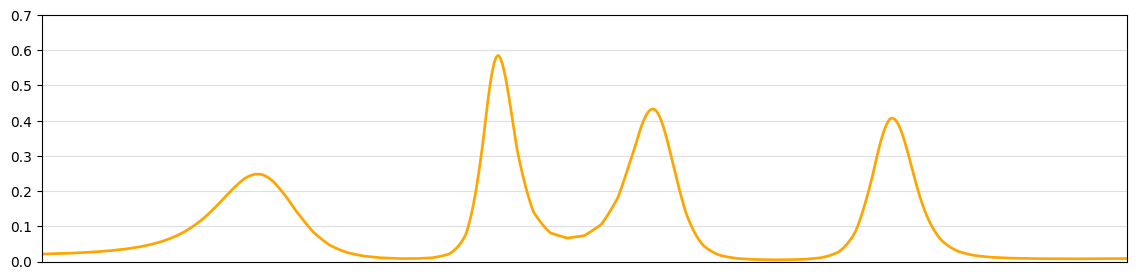

In [98]:
import scipy as sp
surface_density = sp.stats.norm.pdf(mu, 0.0, std)
plt.close()
plt.figure(figsize=(4*3.5, 4*0.8))
plt.grid(False)
plt.grid(axis='y', linestyle='-', linewidth=0.8, alpha=0.4)
plt.plot(surface_density, color='orange', linewidth=1.95)
plt.ylim(0.0, 0.7)
plt.xlim(0, len(mu))
plt.xticks([])  # Or plt.gca().set_xticks([])

# We need a renderer to calculate the bbox
renderer = plt.gcf().canvas.get_renderer()

# Get the tight bounding box in *figure pixels*
tight_bbox_px = plt.gcf().get_tightbbox(renderer)

expanded_bbox_px = tight_bbox_px.padded(0) # Start with an exact copy
expanded_bbox_px.y1 += 0.25


plt.savefig('./figures/1DexPsur.pdf', bbox_inches=expanded_bbox_px, dpi=1024, pad_inches=0.03)
plt.show()

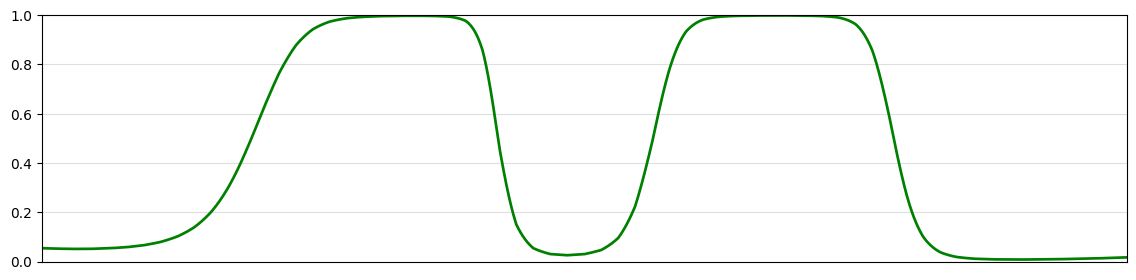

In [99]:
inside_prob = sp.stats.norm.cdf(mu, 0.0, std)

plt.close()
plt.figure(figsize=(4*3.5, 4*0.8))
plt.grid(False)
plt.grid(axis='y', linestyle='-', linewidth=0.8, alpha=0.4)
plt.plot(inside_prob, color='green', linewidth=1.95)
plt.ylim(0.0, 1.0)
plt.xlim(0, len(mu))
plt.xticks([])  # Or plt.gca().set_xticks([])

# We need a renderer to calculate the bbox
renderer = plt.gcf().canvas.get_renderer()

# Get the tight bounding box in *figure pixels*
tight_bbox_px = plt.gcf().get_tightbbox(renderer)

expanded_bbox_px = tight_bbox_px.padded(0) # Start with an exact copy
expanded_bbox_px.y1 += 0.25


plt.savefig('./figures/1DexPin.pdf', bbox_inches=expanded_bbox_px, dpi=1024, pad_inches=0.03)
plt.show()

In [51]:
from plyfile import PlyData, PlyElement
import numpy as np
data = PlyData.read("./data/LucyModel_v1.ply")
std = np.array(data.elements[0].data["noise_std"])

data1 = PlyData.read("./output/LucyModel.ply")
std1 = np.array(data1.elements[0].data["noise_std"])

In [52]:
# diagonalSize = 19.2615056525
diagonalSize = 15.9
print(f"{np.min(std)} {np.max(std)}")
print(f"{np.min(std)/diagonalSize} {np.max(std)/diagonalSize}")
print(f"{np.min(std1)/diagonalSize} {np.max(std1)/diagonalSize}")
# np.min(std1)


# 100 * (0.2/diagonalSize)
# Error v2: 0.49711360871416965 1.711882322839221
# Prior error: 0.011984353340318743 0.060503136764907234
np.mean(std) / diagonalSize

0.022352924570441246 0.04678975045681
0.0014058443126063677 0.0029427516010572326
0.00011984353340318742 0.0006050313676490723


0.0018815514660856258

In [8]:
from plyfile import PlyData, PlyElement
import numpy as np
data = PlyData.read("./output/Fox1cm_01.ply")
std01 = np.array(data.elements[0].data["noise_std"])

data1 = PlyData.read("./output/Fox1cm_001.ply")
std001 = np.array(data1.elements[0].data["noise_std"])

data2 = PlyData.read("./output/Fox1cm_0002.ply")
std0002 = np.array(data2.elements[0].data["noise_std"])

0.0009946943010170448 0.004762955350319141
0.0004926710129540584 0.0006914806793335126
0.0001846125401405211 0.00024689288176407063


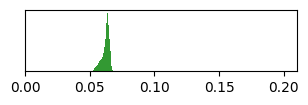

In [50]:
diagonalSize = 19.7
print(f"{np.min(std01)/diagonalSize} {np.max(std01)/diagonalSize}")
print(f"{np.min(std001)/diagonalSize} {np.max(std001)/diagonalSize}")
print(f"{np.min(std0002)/diagonalSize} {np.max(std0002)/diagonalSize}")
plt.figure(figsize=(1*3.5, 1*0.8))
# plt.hist(std01/diagonalSize*100, bins=200, density=True, alpha=0.85)
plt.hist(std001/diagonalSize*100, color='green', bins=200, density=True, alpha=0.8)
# plt.hist(std0002/diagonalSize*100, color='red', bins=200, density=True, alpha=0.8)
plt.xlim(0*100, 0.0021*100)
plt.yticks([])  # Or plt.gca().set_xticks([])
plt.savefig('./figures/plotFox0002.png', bbox_inches='tight', dpi=512)

In [27]:
0.209/diagonalSize

0.010609137055837563

1.0756879326321207

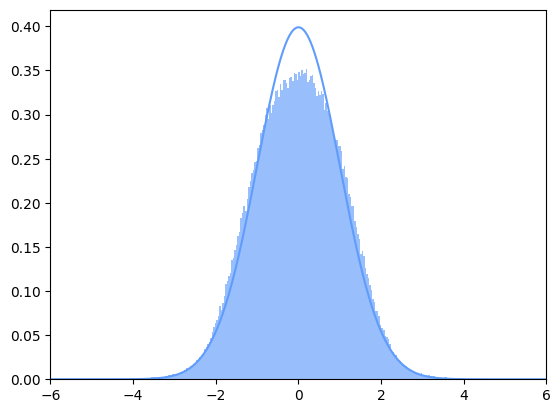

In [113]:
models = ["Bunny", "Frog", "Hand", "LightBulb", "Fox", "Cat", "SH2"]
models = ["Hand"]
def read_array_from_file(filename):
    with open(filename, "rb") as file:
        # Read the size of the array
        size = np.fromfile(file, dtype=np.int32, count=1)[0]

        # Read the array elements
        data = np.fromfile(file, dtype=np.float32, count=size)
    return data

points = np.array([])
for model in models:
    for numP in [60]:
        for i in [0, 1, 2]:
            data = read_array_from_file(f"./output/stats/{model}_{numP}K_0.032_{i}_xyErrors.bin")
            points = np.concatenate((points, data))
plt.hist(points, bins=400, density=True, color="#7faefa", alpha=0.8)
x = np.linspace(np.min(points), np.max(points), 1000)
# std = np.std(points)
std = 1
plt.plot(x, np.exp(-0.5*x**2/std**2)/(np.sqrt(2*np.pi)*std), color="#609cfc")
plt.xlim(-6, 6)
np.std(points)

In [66]:
from numpy.random import seed
from numpy.random import randn
from scipy.stats import shapiro

In [86]:
stat, p = shapiro(points)
print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=0.970, p=0.000


c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 359748.
  res = hypotest_fun_out(*samples, **kwds)


In [1]:
import trimesh
import point_cloud_utils as pcu
import numpy as np

In [ ]:

"""
Happy500K0004
ours: 0.00024167457426022142
SSD: 0.00033347919673043345
Poisson: 0.000354361856934535

Happy400K001
ours: 0.0007722217131183897
SSD: 0.0011147712910649639
Poisson: 0.0006809890085742059

Happy350K0025
0.002037529210163492
0.002079699658961003
0.0018168730963730683

Happy300K005
0.004313084973934405
0.003198225616207741
0.0030256335342736225

Happy300K006N1
Ours: 0.004770865433463137
SSD: 0.005111801770430087
Poisson: 0.004116324417524322

Happy400K002N1
Ours: 0.0013521149789626776
SSD: 0.002212569232822931
Poisson: 0.0014103496120214775

Dragon400K002N1
0.0012076120211457842
0.001752271827221564
0.0013084515260280095

"""

def getMeanDist(mesh, omesh):
    m = trimesh.Trimesh(vertices=mesh.vertices, faces=mesh.faces)
    points, _ = trimesh.sample.sample_surface(m, count=10000000)
    dist, fid, bc = pcu.closest_points_on_mesh(points.astype(dtype=np.float64, order='C'), omesh.vertices, omesh.faces)
    return np.mean(dist)


name = "Happy500K0006N1"
omesh = trimesh.load("./models/Happy.ply", force='mesh')
mymod = trimesh.load(f"./output/{name}.ply", force='mesh')
ssdmod = trimesh.load(f"./output/{name}SSD.ply", force='mesh')

cpmod = trimesh.load(f"./output/{name}CP.ply", force='mesh')

print(0.4366 * getMeanDist(mymod, omesh))
print(0.4366 * getMeanDist(ssdmod, omesh))
print(0.4366 * getMeanDist(cpmod, omesh))

0.00017617179935075606
0.00020400663159014012
0.00018492285489485108
